<a href="https://colab.research.google.com/github/raulFuzita/cct_data_visualisation_communication/blob/CA2/raul_fuzita_AI_DV_DP_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CCT College Dublin Continuous Assessment**

## **Assessment Information**

Programme Title:             BSc (Hons) in Computing and IT Y4

Cohort:                      Y4

Module Title(s):             Artificial Intelligence, Data Visualisation & Communication

Assignment Title:            AI_DV_DP_Lv8_ICA_v1

Lecturer(s):                 David McQuaid, Marina Soledad Iantorno

Issue Date:                  13/12/2021

Submission Deadline Date:    16/01/2022

## **Student Information**

Name:                        Raul Macedo Fuzita

ID:                          2018337



## Jupyter Notebook Information <font color='red'>(Important)</font>

<p align="justify">
&emsp;&emsp;This assignment was performed on Google Colab in Jupyter Notebook. This notebook contains advanced features such as HTML tags, Jupyter Notebook form components compatible with the version below or above, and Widgets components.

&emsp;&emsp;If you are running on your local machine, please check if your Jupyter Notebook has the same version or above. This notebook was not tested in an old version, so I cannot guarantee support for the legacy notebooks.

&emsp;&emsp;If you are not sure what Jupyter Notebook version you have, you will find a command to check the version. You can access this material on my Github account, available at:  <a href="https://github.com/raulFuzita/cct_ai/tree/CA2">https://github.com/raulFuzita/cct_ai/tree/CA2</a>
</p>

```
jupyter core     : 4.5.0
jupyter-notebook : 5.2.2
qtconsole        : 4.5.2
ipython          : 5.5.0
ipykernel        : 4.10.1
jupyter client   : 5.3.1
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.5.0
nbformat         : 4.4.0
traitlets        : 4.3.2
```

&emsp;&emsp;Make your own changes or have a copy in you Google Drive. Go to `File > Save a copy in Drive`

In [ ]:
#@markdown 👈 **Please, run this code cell to check your Jupyter Notebook version.** <font color="lightgreen">(Recommended)</font>
!jupyter --version

# Data Visualisation & Communication

## Importing All the Necessary Packages for This project <font color="red">(Important)</font>

In [ ]:
#@markdown 👈 Please, run this cell to import the following libraries: `pandas, numpy, matplotlib, seaborn,ipywidgets`.

#@markdown If one of these packages are not imported you will experience errors and failures. You must install these packages.

import pandas as pd               # Pandas allows multi-dimensional arrays. It's usefull for machine learning, data analysis, and data science
import numpy as np                # Numpy provides function to work with arrays, domain of linear algebra, fourier transformation, and matrices (w3school, NumPy Introduction)
import matplotlib.pyplot as plt   # Matplotlib is a low level graph plotting library in python that serves as a visualization utility (w3school, Matplotlib Tutorial). 
import seaborn as sns             # Seaborn allows you to plot 
import ipywidgets as widgets

def mmnorm(v):
    return (v - v.min()) / (v.max() - v.min())

## Importing the data set <font color='red'>(Important)</font>

In [ ]:
#@markdown 👈 Please, run this cell to import the data set from a source available at [https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/]("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/)

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#@markdown If the data set is imported correctly you should see the five first rows.
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Analyse the data, select appropriate visualisations to summarise the data before cleaning it and perform the same visualisations after data cleaning. Summarise any differences that you discover. Briefly explain the advantages of preparing the data for further analysis in terms of graphic presentation.

#### Before Cleaning

In [ ]:
#@markdown 👈 Please, run this cell to show data type of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
#@markdown 👈 Please, run this cell to show a summary of the data set.
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


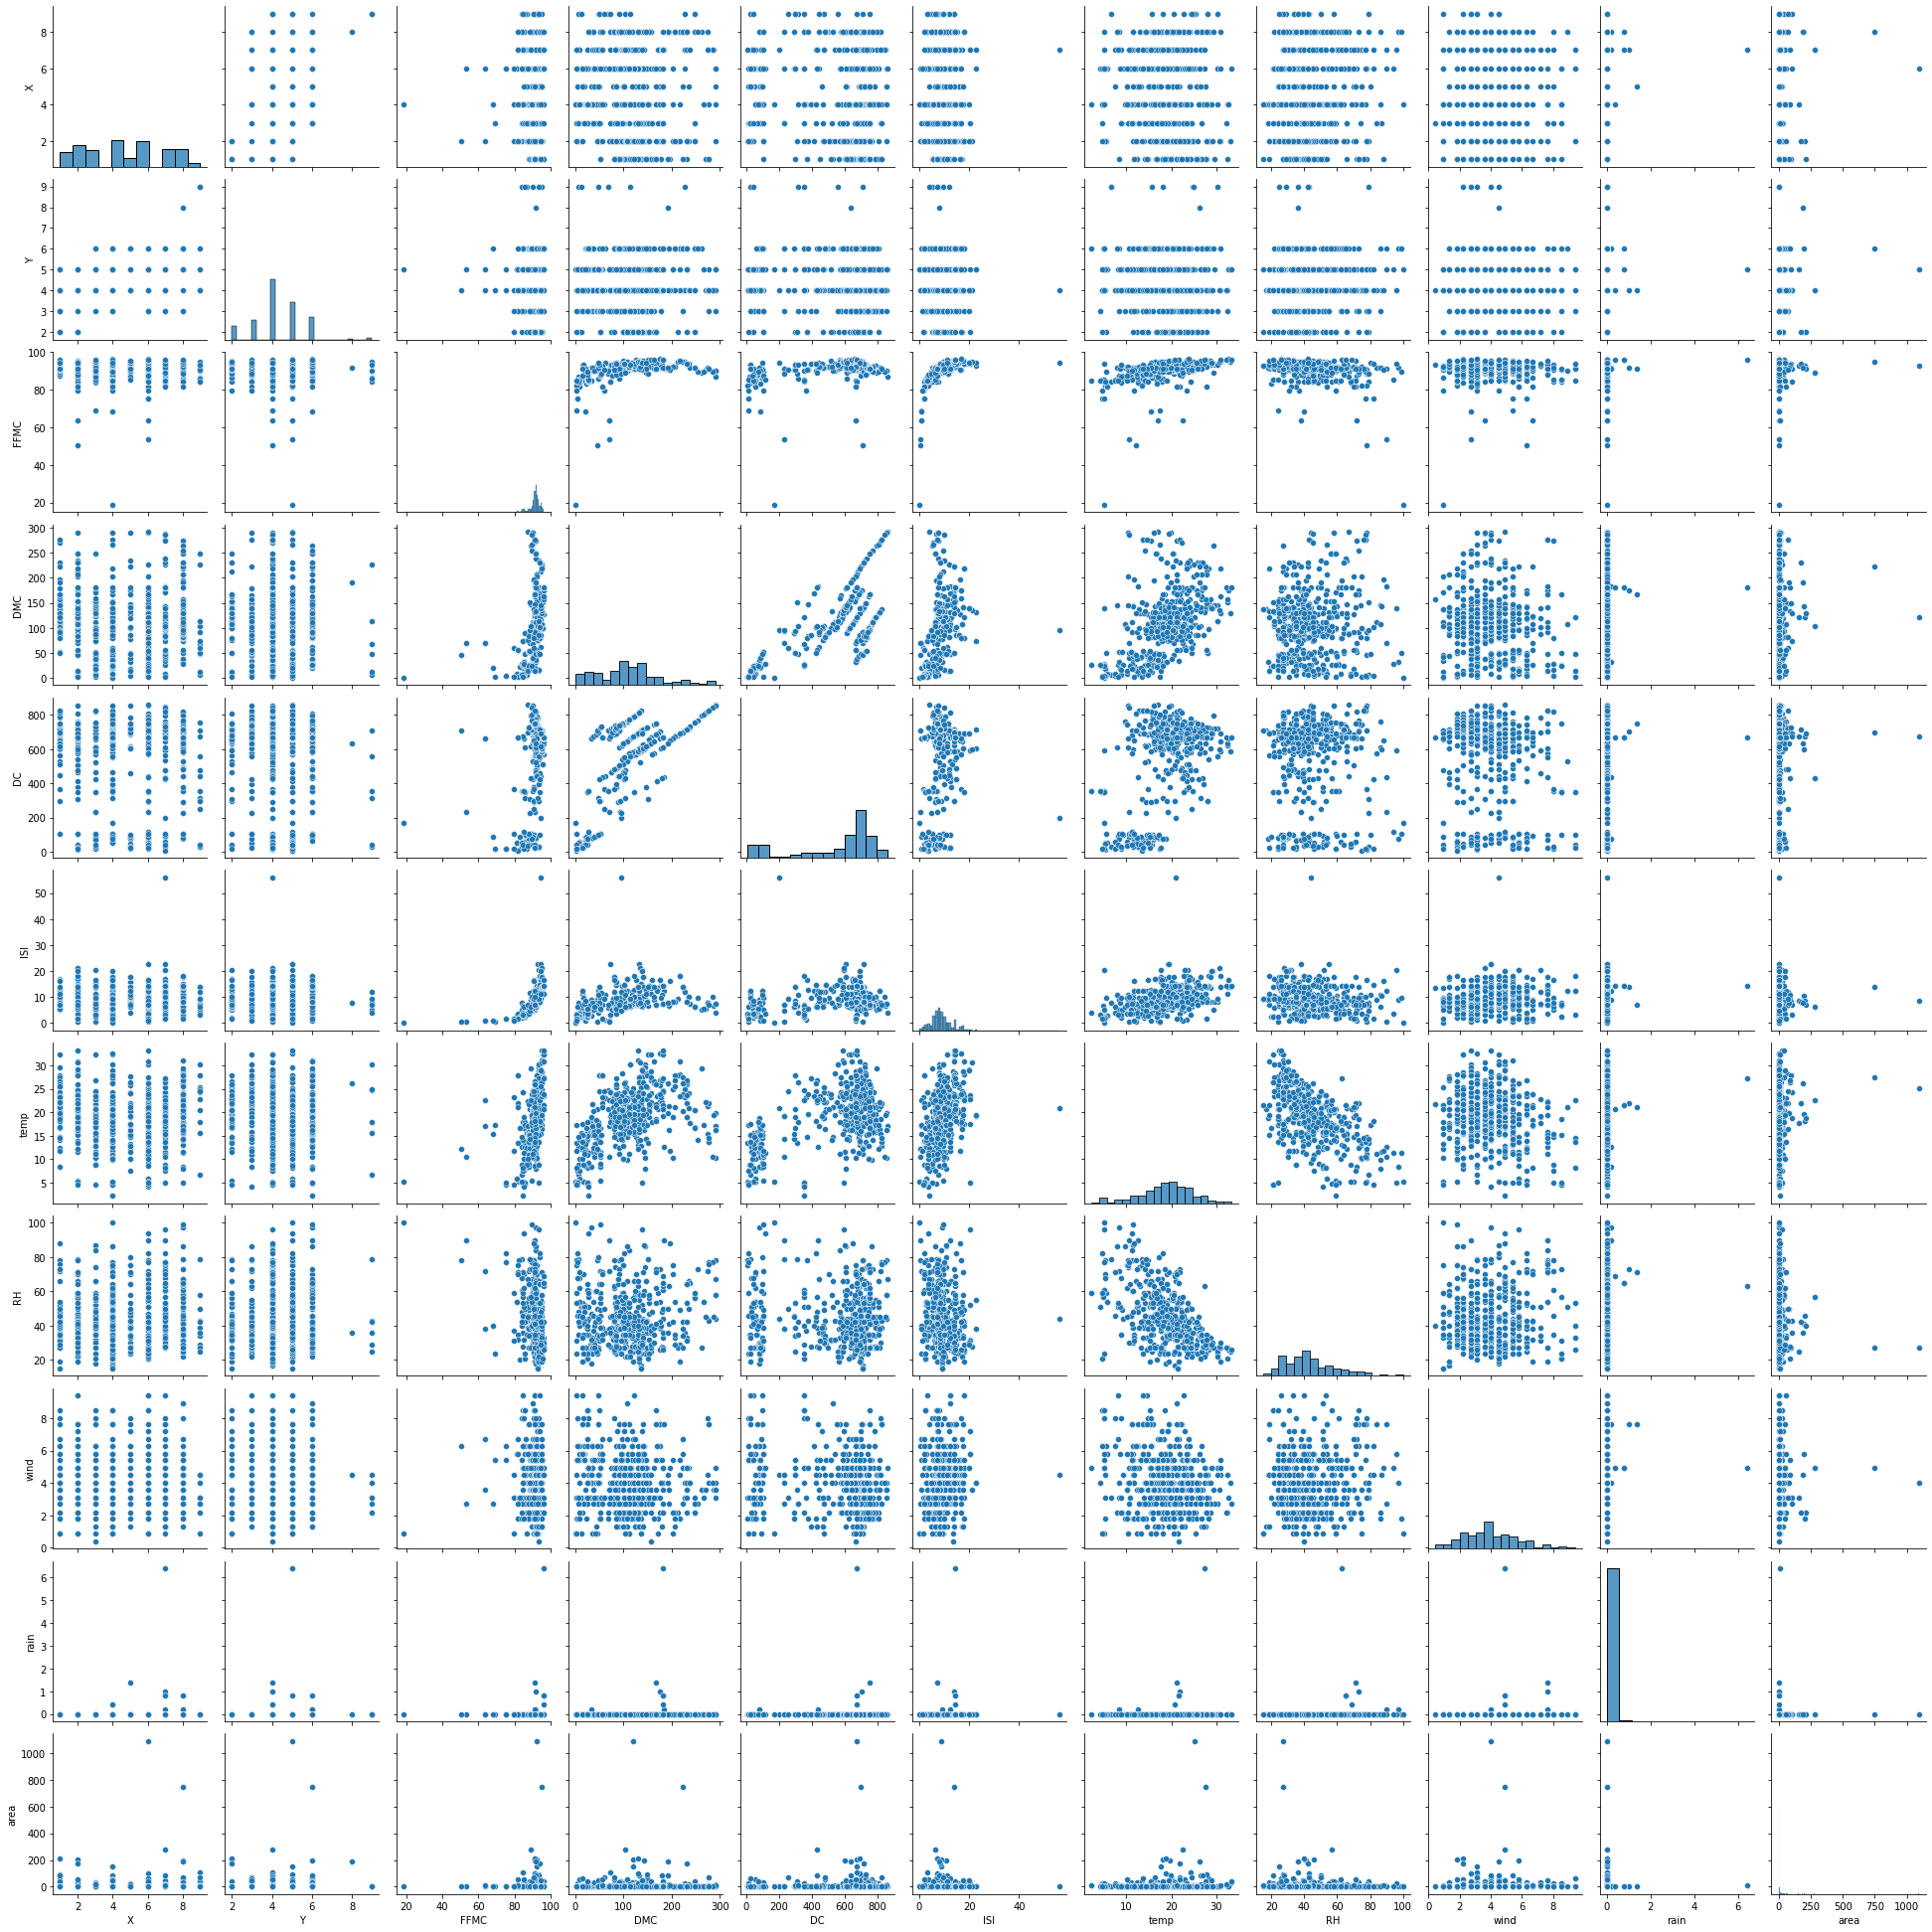

In [ ]:
#@markdown 👈 Please, run this cell to plot pairwise relationships of the dataset.
sns.pairplot(df)

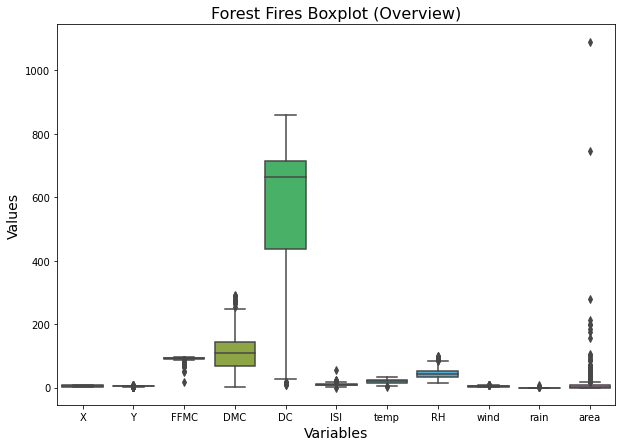

In [ ]:
#@markdown 👈 Please, run this cell to plot a boxplot of the data set.
plt.figure(figsize=(10,7))
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Forest Fires Boxplot (Overview)', fontsize=16)
sns.boxplot(data=df)

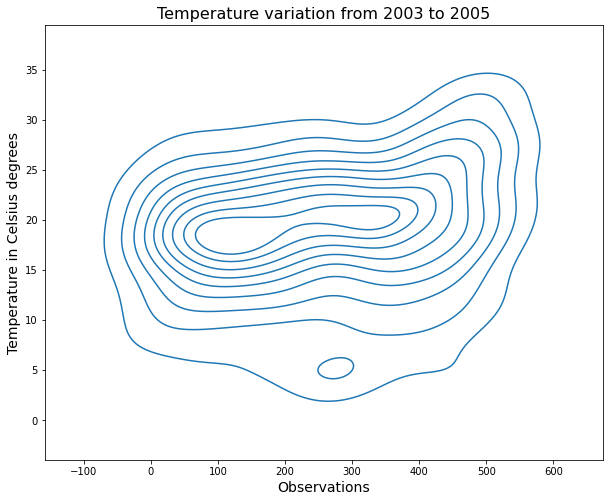

In [ ]:
#@markdown 👈 Please, run this cell to plot univariate or bivariate distributions using kernel density estimation.
plt.figure(figsize=(10,8))
plt.xlabel('Observations', fontsize=14)
plt.ylabel('Temperature in Celsius degrees', fontsize=14)
plt.title('Temperature variation from 2003 to 2005', fontsize=16)
sns.kdeplot(x=df['temp'].index, y=df['temp'])

Text(0.5, 1.0, 'The Fine Fuel Moisture Code (FFMC) variation from 2003 to 2005\nRange from 0 - 101')

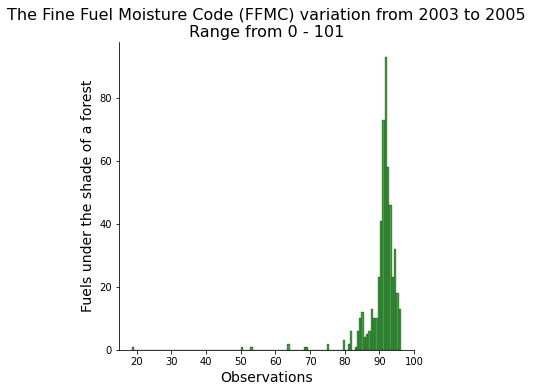

In [ ]:
#@markdown 👈 Please, run this cell to plot the values of The Fine Fuel Moisture Code (FFMC)
sns.displot(df['FFMC'], color = 'green')
plt.xlabel('Observations', fontsize=14)
plt.ylabel('Fuels under the shade of a forest', fontsize=14)
plt.title('The Fine Fuel Moisture Code (FFMC) variation from 2003 to 2005\nRange from 0 - 101', fontsize=16)

In [ ]:
#@markdown 👈 Please, run this cell to generate a matrix with the correlation between the variables.
df_corr = df.corr()

Text(0.5, 1.0, 'Correlation between variables\n')

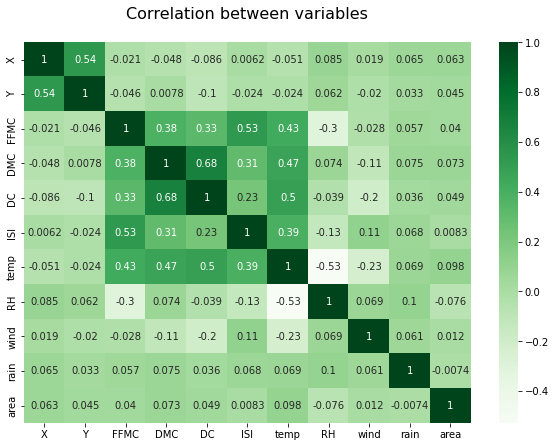

In [ ]:
#@markdown 👈 Please, run this cell to plot a heatmap that shows the correlation between the variables.
plt.figure(figsize=(10,7))
sns.heatmap(df_corr, annot=True, cmap='Greens')
plt.title('Correlation between variables\n', fontsize=16)

#### Data Cleaning

In [ ]:
#@markdown 👈 Please, run this cell to show if there any NA values in any of the variables.
pd.isna(df).sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
#@markdown 👈 Please, run this cell to check if there is duplicated values in the data set.
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [ ]:
#@markdown 👈 Please, run this cell to drop the duplicated values.
dfclean = df.drop_duplicates()
len(dfclean[dfclean.duplicated()].index)

0

In [ ]:
#@markdown 👈 Please, run this cell to drop the columns X and Y.
dfclean.drop(dfclean.columns[[0, 1]], axis = 1, inplace = True)
dfclean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
#@markdown 👈 Please, run this cell to rename some columns to more meaningful names.
dfclean.rename(columns = {'day':'day_of_week', 'temp':'temperature'}, inplace = True)
dfclean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,month,day_of_week,FFMC,DMC,DC,ISI,temperature,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
#@markdown 👈 Please, run this cell to convert the values of variable area to logarithm tranformation.
dfclean['area'] = np.log(dfclean['area']+2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


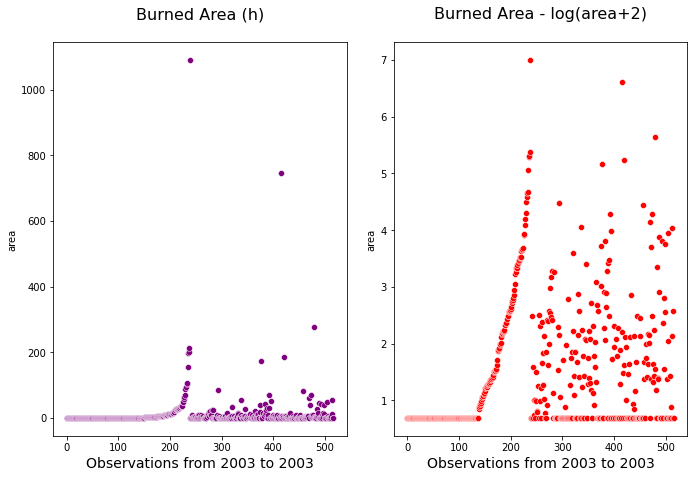

In [ ]:
#@markdown 👈 Run this cell to plot the difference between the area values before and after the logarithm transformation.

#@markdown By transforming area values we can see on the right plot the dots more spread in the graph.
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df['area'], color='purple')
plt.xlabel('Observations from 2003 to 2003', fontsize=14)
plt.title('Burned Area (h)\n', fontsize=16)
plt.subplot(1, 2, 2)
sns.scatterplot(data=dfclean['area'], color='red')
plt.xlabel('Observations from 2003 to 2003', fontsize=14)
plt.title('Burned Area - log(area+2)\n', fontsize=16)
plt.tight_layout(2)

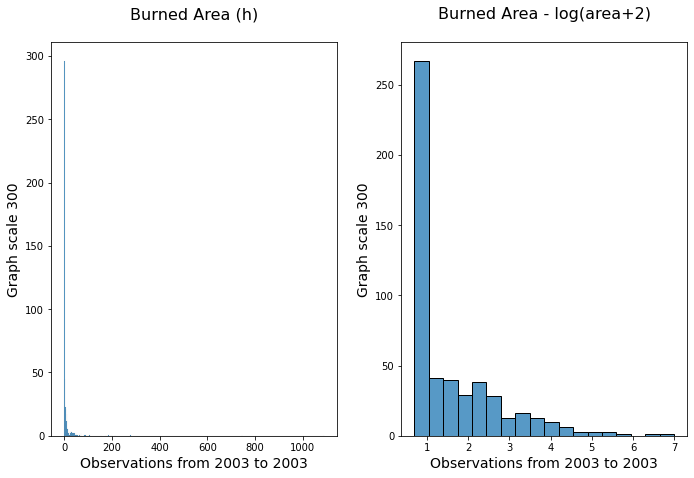

In [ ]:
#@markdown 👈 Please, run this cell to plot the burned area in hectares and the area converted in logarithm tranformation.
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
sns.histplot(df['area'])
plt.xlabel('Observations from 2003 to 2003', fontsize=14)
plt.ylabel('Graph scale 300', fontsize=14)
plt.title('Burned Area (h)\n', fontsize=16)
plt.subplot(1, 2, 2)
sns.histplot(dfclean['area'])
plt.xlabel('Observations from 2003 to 2003', fontsize=14)
plt.ylabel('Graph scale 300', fontsize=14)
plt.title('Burned Area - log(area+2)\n', fontsize=16)
plt.tight_layout(2)

#### After Cleaning

In [ ]:
#@markdown 👈 Please, run this cell to show an overview of the data set after the cleaing process.
dfclean

,month,day_of_week,FFMC,DMC,DC,ISI,temperature,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.693147
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.693147
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.693147
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.693147
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.132982
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.030517
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.577182
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.693147


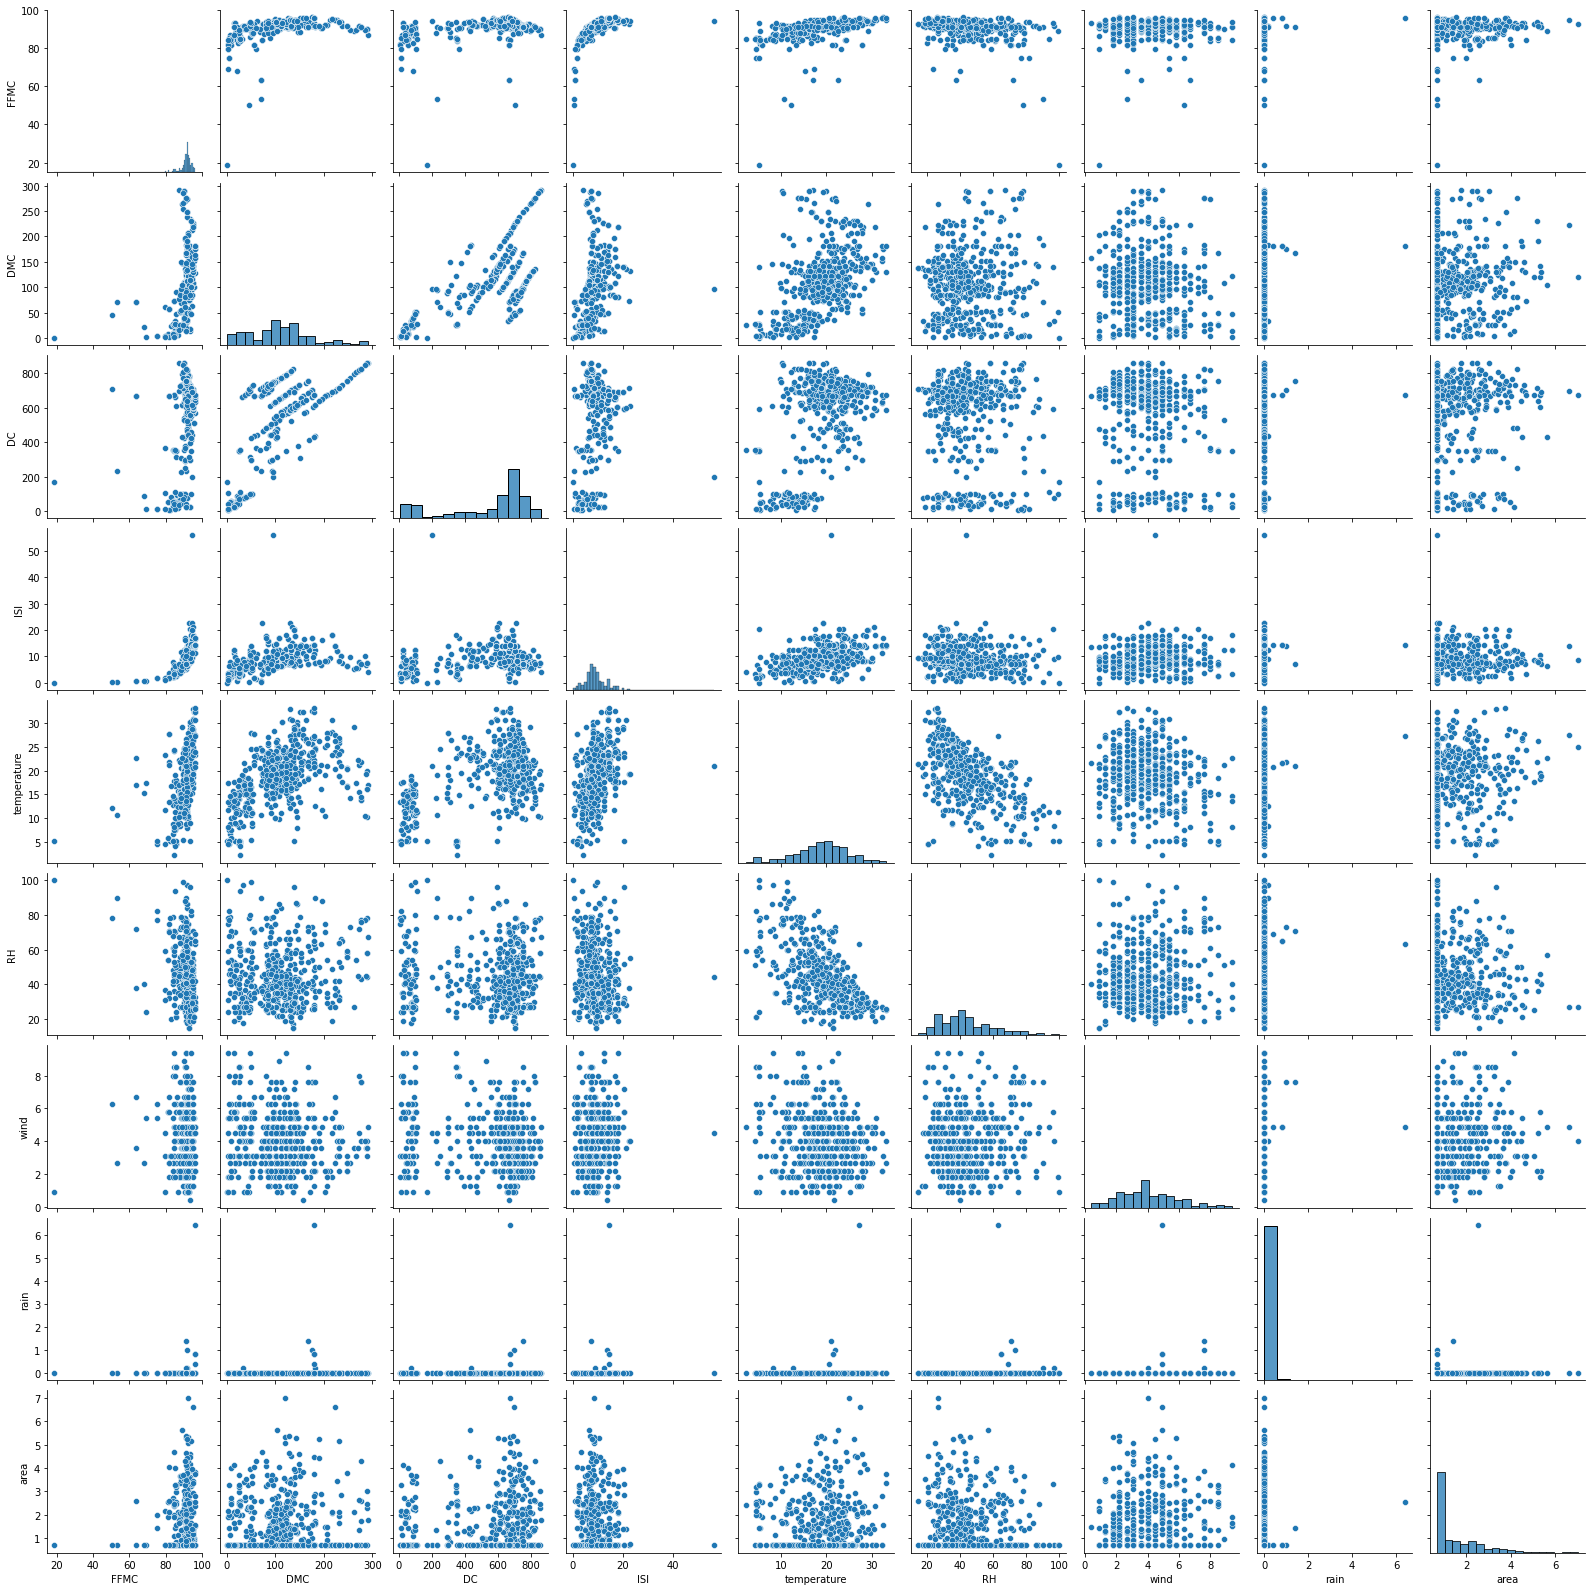

In [ ]:
#@markdown 👈 Please, run this cell to plot pairwise relationships of the dataset.
sns.pairplot(dfclean)

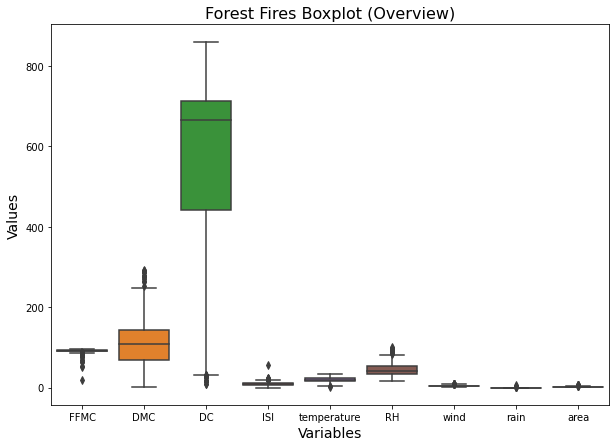

In [ ]:
#@markdown 👈 Please, run this cell to plot a boxplot of the data set.
plt.figure(figsize=(10,7))
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Forest Fires Boxplot (Overview)', fontsize=16)
sns.boxplot(data=dfclean)

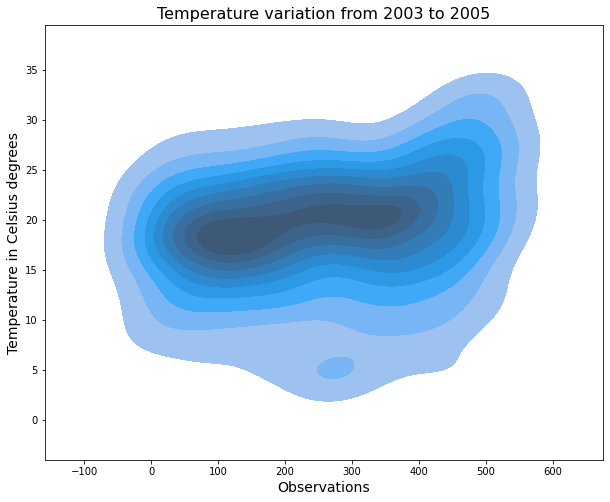

In [ ]:
#@markdown 👈 Please, run this cell to plot univariate or bivariate distributions using kernel density estimation.

plt.figure(figsize=(10,8))
plt.xlabel('Observations', fontsize=14)
plt.ylabel('Temperature in Celsius degrees', fontsize=14)
plt.title('Temperature variation from 2003 to 2005', fontsize=16)
sns.kdeplot(x=dfclean['temperature'].index, y=dfclean['temperature'], shade = True)

Text(0.5, 1.0, 'The Fine Fuel Moisture Code (FFMC) variation from 2003 to 2005\nRange from 0 - 101')

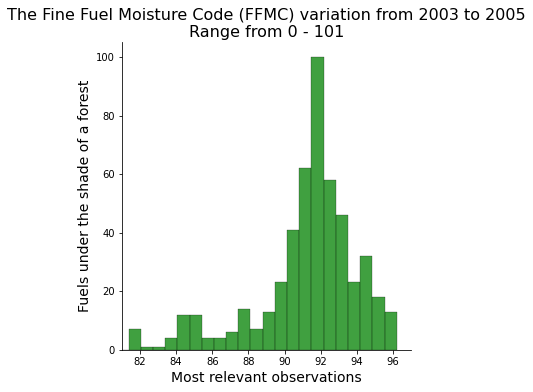

In [ ]:
#@markdown 👈 Please, run this cell to plot the values of The Fine Fuel Moisture Code (FFMC)
g = sns.displot(dfclean['FFMC'], color='green')
g.set(xlim=(81, 97))
plt.xlabel('Most relevant observations', fontsize=14)
plt.ylabel('Fuels under the shade of a forest', fontsize=14)
plt.title('The Fine Fuel Moisture Code (FFMC) variation from 2003 to 2005\nRange from 0 - 101', fontsize=16)

In [ ]:
#@markdown 👈 Please, run this cell to generate a matrix with the correlation between the variables.
dfclean_corr = dfclean.corr()

Text(0.5, 1.0, 'Correlation between variables\n')

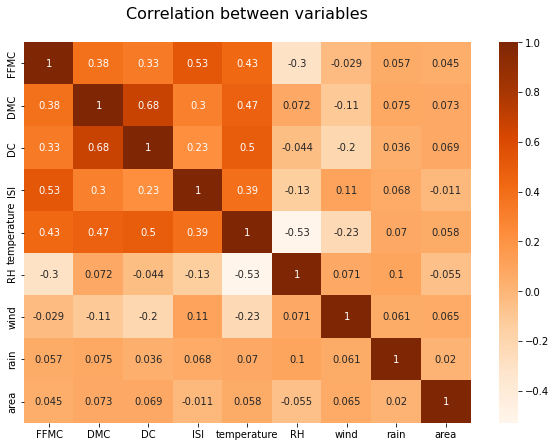

In [ ]:
#@markdown 👈 Please, run this cell to plot a heatmap that shows the correlation between the variables.

plt.figure(figsize=(10,7))
sns.heatmap(dfclean_corr, annot=True, cmap='Oranges')
plt.title('Correlation between variables\n', fontsize=16)

### Use more than one interactive visualisation to highlight any impact that forest fire has on the environment. You are required to use additional data and merge it with the dataset provided to complete this task.

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morai stated in their research, A Data Mining Approach to Predict Forest Fires using Meteorological Data, that additional data were necessary such as vegetation and firefighting intervention; however not available. I could not find any data set with that information to add to this analysis.
<br>
&emsp;&emsp;This research has the objective of predicting small fires. Therefore, the data set has not enough information or reliability to be used as a base for environmental impact in other counties or in the world. The data set is about a natural park in Portugal called Montesinho (Little hill). The methods used are not except in all countries.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
In particular, the Canadian forest Fire Weather Index (FWI) [24] system was designed in the 1970s when computers were scarce, thus it required only simple calculations using look-up tables with readings from four meteorological observations (i.e. temperature, relative humidity, rain and wind) that could be manually collected in weather stations. Nevertheless, nowadays this index highly used not only in Canada but also in several countries around the world (e.g. Argentina or New Zealand).<br>
Even though Mediterranean climate differs from those in Canada, the FWI system was correlated with fire activity in southern Europe countries, including Portugal [26]. (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
As argued in [18], predicting the size of forest fires is
a challenging task. To improve it, we believe that additional information (not available
in this study) is required, such as the type of vegetation and firefighting intervention
(e.g. time elapsed and firefighting strategy) (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>



<p align="justify">
&emsp;&emsp;The figure below shows the location of Montesinho natural park in a zoom of 300 km.
</p>

<img src="https://github.com/raulFuzita/cct_data_visualisation_communication/blob/CA2/montesinho_300km.png?raw=true">

<p align="justify">
&emsp;&emsp;The figure below shows the location of Montesinho natural park in a zoom of 500 m.
</p>

<img src="https://github.com/raulFuzita/cct_data_visualisation_communication/blob/CA2/montesinho_500m.png?raw=true">

<p align="justify">
&emsp;&emsp;As we can see the area is quite small and also the data set. The data set was useful to create a model and predict small fires.
</p>

In [ ]:
#@markdown 👈 Please, run this cell to plot all the numeric variables in a interactive graph.

#@markdown Select what data you would like to see individually or select the default option to show them all.

dfplot = dfclean.iloc[:,2:10]

options = ['FFMC',	'DMC',	'DC',	'ISI',	'temperature',	'RH',	'wind',	'rain', 'Default']
four_country_picker = widgets.SelectMultiple(
    options=options,
    value=list(options),
    description='FWI Codes: '
)

@widgets.interact(symbols=four_country_picker)
def render(symbols):
  if 'Default' in symbols:
    symbols = tuple(options)
  selected = dfplot[dfplot.columns[dfplot.columns.isin(symbols)]]
  plt.figure(figsize =(12, 9))
  plt.plot(selected)
  plt.xlabel('Observations from 2003 to 2005', fontsize=14)
  plt.ylabel('Values', fontsize=14)
  plt.title('Variables that can influence the size of a burned area\n', fontsize=16)
  plt.legend(list(symbols), loc='upper left', prop={'size': 14})
  plt.show()

interactive(children=(SelectMultiple(description='FWI Codes: ', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('F…

### Use statistical visualisations to describe and identify different aspects of the data (e.g., median, outliers, probabilistic histogram, etc...).

In [ ]:
#@markdown 👈 Please, run this cell to instance a new object to store the numerical variables normalized by using Min-Max Normalization. Area variable is not included since this variable was converted by using logarithm transformation.

df_mmnorm = dfclean.iloc[:,2:10].apply(mmnorm)

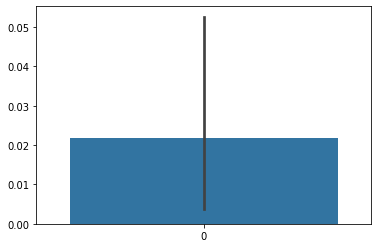

In [ ]:
#@markdown 👈 Please, run this cell to plot a graph of rain variable. If we plot this variable with other variables it appears to have outliers due to its small range of values.

#@markdown rain - outside rain in mm/m2 : 0.0 to 6.4

sns.barplot(data=dfclean['rain'])

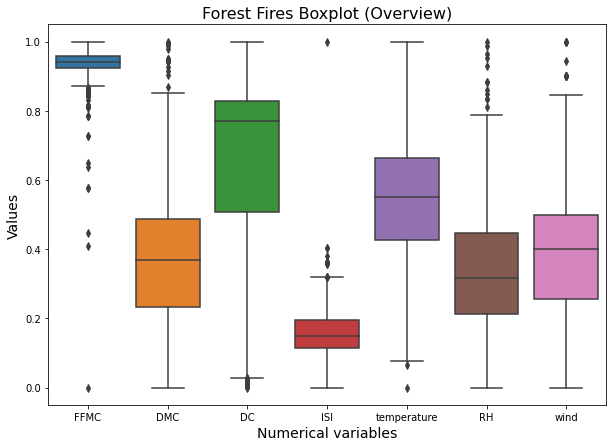

In [ ]:
#@markdown 👈 Please, run this cell to plot a boxplot for each variable.
plt.figure(figsize=(10,7))
plt.xlabel('Numerical variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Forest Fires Boxplot (Overview)', fontsize=16)
sns.boxplot(data=df_mmnorm.iloc[:,:7])

<p align="justify">
&emsp;&emsp;Outliers are either three times Interquartile Range (IQR) or above the 3rd quartile or below the 1st quartile.
<br>
&emsp;&emsp;In our data set all all variables show some kind of outliers. As we mentioned before, the variable area show the largest discrepancy since the data is skewed towards 0.0.
</p>

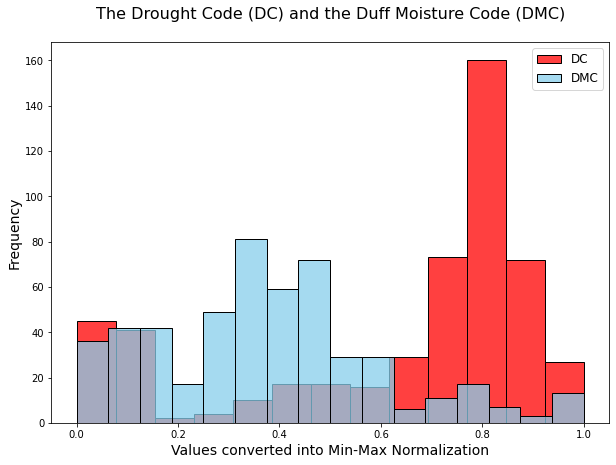

In [ ]:
#@markdown 👈 Please, run this cell to plot a hsitogram plot to show the relation bettwen the Drought Code (DC) and the Duff Moisture Code (DMC)

plt.figure(figsize=(10,7))
sns.histplot(mmnorm(dfclean['DC']), color = 'Red', label = 'DC')
sns.histplot(mmnorm(dfclean['DMC']), color = 'skyblue', label = 'DMC')
plt.legend(fontsize = 12)
plt.xlabel('Values converted into Min-Max Normalization', fontsize=14, color = 'black')
plt.ylabel('Frequency', fontsize=14, color = 'black')
plt.title('The Drought Code (DC) and the Duff Moisture Code (DMC)\n', fontsize=16)
plt.xticks(color = 'black')
plt.yticks(color = 'black')

plt.show()

<p align="justify">
&emsp;&emsp;In this comparison, we can see when DC is higher DMC most of the time reduces and vice versa.
</p>
<p align="justify">
&emsp;&emsp;FWI Fuel Moisture Code, definition by NWCG (<a href="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system">NWCG, 2021</a>):

<b>&emsp;&emsp;Duff Moisture Code (DMC)</b> - represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels.

<b>&emsp;&emsp;Drought Code (DC)</b> - much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels.
</p>

### Compare and contrast at least two different visualisation libraries that you used to complete the tasks of this assignment. Detail the differences and/or similarities between these libraries. Rationalise your design choices such as colour selection, font size, use of white spaces, etc...

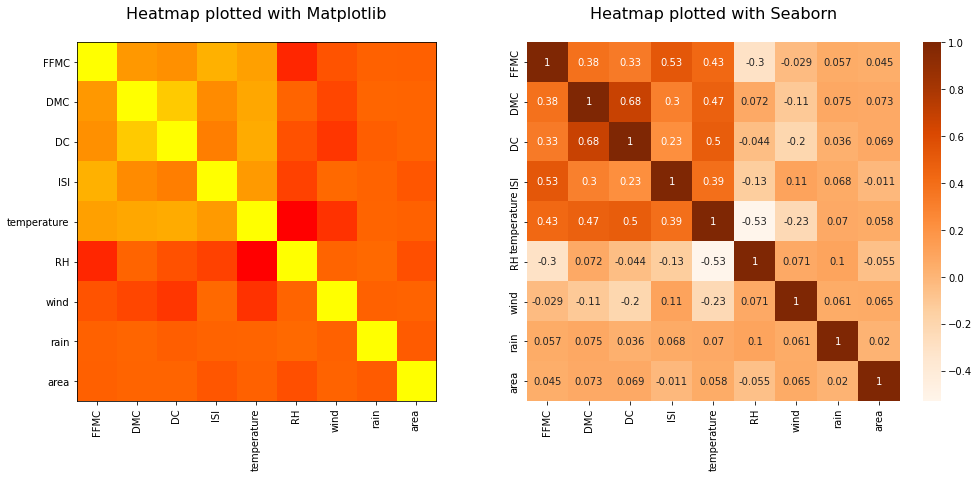

In [ ]:
#@markdown 👈 Please, run this cell to plot comparison between two graphical packages.

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
names = list(dfclean_corr.columns)
plt.xticks(ticks=np.arange(len(names)),labels=names,rotation=90)
plt.yticks(ticks=np.arange(len(names)),labels=names)
plt.imshow( dfclean_corr , cmap='autumn' , interpolation='nearest' )
plt.title('Heatmap plotted with Matplotlib\n', fontsize=16)
plt.subplot(1, 2, 2)
sns.heatmap(dfclean_corr, annot=True, cmap='Oranges')
plt.title('Heatmap plotted with Seaborn\n', fontsize=16)
plt.tight_layout(2)

<p align="justify">
&emsp;&emsp;The heatmap on the right was plotted with the package matplotlib and the heatmap on he left with Seaborn package.
<br>
&emsp;&emsp;We can see that Matplotlib's plot has solid colours and not the correlation values in the grid. It does not have the legend on the right either. Seaborn on the other hand clearly has much more balanced colours, correlation values in the grid, and legend on the left.
<br>
&emsp;&emsp;Seaborn built on top of Matplotlib; however, it abstract functions and properties by creating a standard configuration for all Seaborn plots. For sometimes it is easier to plot certain types of data and for others Sanborn does the job elegantly.
</p>

<p align="justify">
&emsp;&emsp;To make readable the titles, y-axis labels, and x-axis labels, I defined the title size for 16 and the labels to 14. Some plots have legends with details about the variables, it was set to size 14. The original size for the legend is hard to see in a plot with many colours and a big scale.
&emsp;&emsp;A new line in some cases it was needed to create some spaces between the title of the plot itself.
<br>
&emsp;&emsp;When a plot has to display the values of more than one variable multicolour draws were used to highlight each variable. In some cases when a value overlaps another using transparency adds more context to the visualization.
<br>
&emsp;&emsp;Another aspect that was implemented to improve the visualization was to use colours we usually relate to things, for instance, heat to red or orange, green to nature, blue to weather, and avoid solid colours except when we compared both heatmaps from Matplotlib and Seaborn package.
</p>

### Pick a target audience of your choice, design your visualizations with this audience in mind.

In [ ]:
#@markdown 👈 Please, run this cell to select the spatial coordinate X, and Y.
spatial_coordinate = df.loc[:,['X','Y']]

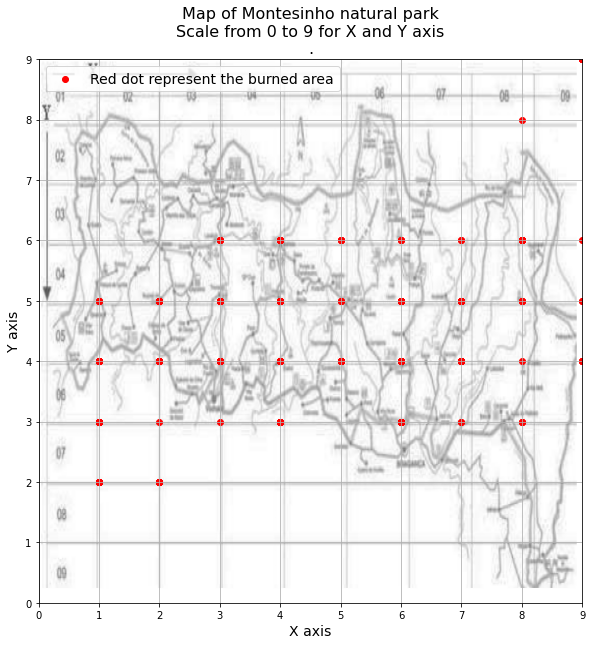

In [ ]:
#@markdown 👈 Please, run this cell to plot a map of Montesinho natural park (object of the data set) and the areas where were registered fires. Each square of the grid represents 1ha (hectare).

img = plt.imread("https://github.com/raulFuzita/cct_data_visualisation_communication/blob/CA2/montisinho_park.png?raw=true")
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img, extent=[0, 9, 0, 9])
ax.scatter(x='X', y='Y', data=spatial_coordinate, c='red')
plt.xlabel('X axis', fontsize=14)
plt.ylabel('Y axis', fontsize=14)
plt.title('Map of Montesinho natural park\nScale from 0 to 9 for X and Y axis\n.', fontsize=16)
plt.legend(['Red dot represent the burned area'], loc='upper left', prop={'size': 14})
plt.grid()

In [ ]:
#@markdown 👈 Please, run this cell to isolate the fire areas by spatial coordinate. Then, count unique X and Y values.
fire = len(df.loc[:,['X','Y']].drop_duplicates().index)

<p align="justify">
&emsp;&emsp;According to the information at the page Forest Fires Data Set available at <a href="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">https://archive.ics.uci.edu/ml/datasets/Forest+Fires</a> the spatial coordinates for X are in a range of 1 to 9, and Y is within 2 to 9. The grid has 10 lines vertically and 10 horizontally. It is a total of 100 intersections (10*10=100). To work with a smaller scale we can consider that 100 is the total of area, and the number of unique X and Y coordinates represents the burned area.
</p>

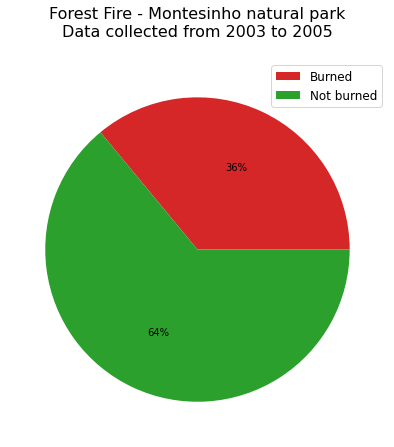

In [ ]:
#@markdown 👈 Please, run this cell to show an approximate proportion of the burned area.

plt.figure(figsize=(10,7))
#762.2110837
park_size = 100
burned_area = fire
green_area = park_size - burned_area

labels = ['Burned', 'Not burned']
colors = ['#d62728', '#2ca02c']

plt.pie([burned_area, green_area], autopct='%.0f%%',  colors=colors)
plt.legend(labels=labels, prop={'size': 12})
plt.title('Forest Fire - Montesinho natural park\nData collected from 2003 to 2005\n', fontsize=16)
plt.show()

### Include final visualisations relevant to the fire officers to illustrate your findings

In [ ]:
#@markdown 👈 Please, run this cell to get unique spatial coordinates, and then join the area variable to the unique spatial coordinates object.

#@markdown The new area variable has to be round and converted to an integer.
uniq_spatial_cord = spatial_coordinate.drop_duplicates()
area = dfclean.loc[uniq_spatial_cord.index, ['area']]
uniq_spatial_cord = uniq_spatial_cord.join(area)
uniq_spatial_cord.area = uniq_spatial_cord.area.round().astype(int)

In [ ]:
#@markdown 👈 Please, run this cell to create a 2D list 9x9. The spatial coordinate will be the index to access the columns and rows. <br>The column area will be the value for the items of the 2D list.

grid = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
]

for index, row in uniq_spatial_cord.iterrows():
  grid[row['Y']-1][row['X']-1] = row['area']

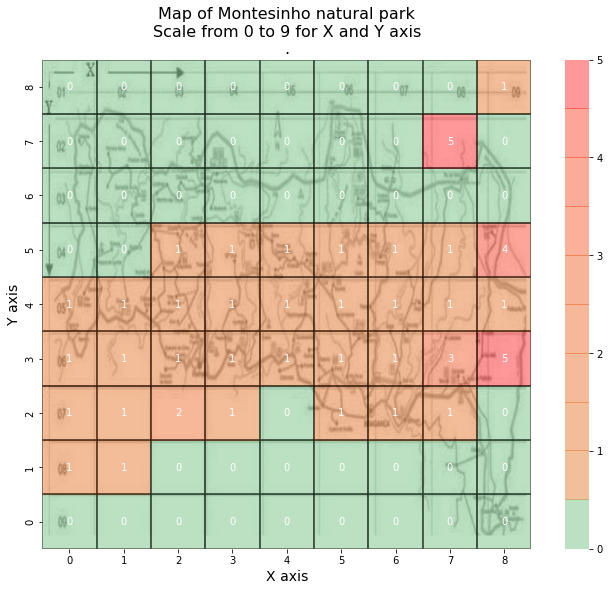

In [ ]:
#@markdown 👈 Please, run this cell to plot the Montesinho park map and the burned areas.

#plt.figure(figsize=(10,7))
colors = ['#56b468', '#de6100', '#e25b00', '#e75400', '#eb4d00', '#ef4500', '#f33b00', '#f73000', '#fb2000', '#ff0000']
img = plt.imread("https://github.com/raulFuzita/cct_data_visualisation_communication/blob/CA2/montisinho_park.png?raw=true")
fig, ax = plt.subplots(figsize=(12,9))
ax.imshow(img, extent=[0, 9, 0, 9])
ax = sns.heatmap(grid, annot=True, linewidths=1, linecolor='black', cmap=colors, alpha  = 0.4)
plt.xlabel('X axis', fontsize=14)
plt.ylabel('Y axis', fontsize=14)
plt.title('Map of Montesinho natural park\nScale from 0 to 9 for X and Y axis\n.', fontsize=16)
ax.invert_yaxis()

In [ ]:
dfclean.iloc[:,2:]

,month,day_of_week,FFMC,DMC,DC,ISI,temperature,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.693147
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.693147
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.693147
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.693147
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.132982
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.030517
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.577182
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.693147


In [ ]:
#@markdown 👈 Please, run this cell to plot all the numeric variables in an interactive graph.

#@markdown Select what data you would like to see individually or select the default option to show them all.

#@markdown You can also select a range of observations with the slider option.
dfplot2 = dfclean.iloc[:,2:]
size = len(dfplot2)

slider = widgets.IntRangeSlider(
    value=[0, size],
    min=0,
    max=size,
    step=1,
    description='Observations:'
)

options = ['FFMC',	'DMC',	'DC',	'ISI',	'temperature',	'RH',	'wind',	'rain', 'area', 'Default']
four_country_picker = widgets.SelectMultiple(
    options=options,
    value=list(options),
    description='FWI Codes: '
)

@widgets.interact(symbols=four_country_picker, slider=slider)
def render(symbols, slider):
  if 'Default' in symbols:
    symbols = tuple(options)
  min = slider[0]
  max = slider[1]
  selected = dfplot2.loc[min:max, dfplot2.columns[dfplot2.columns.isin(symbols)]]
  plt.figure(figsize =(12, 9))
  plt.plot(selected)
  plt.xlabel('Observations from 2003 to 2005', fontsize=14)
  plt.ylabel('Values', fontsize=14)
  plt.title('Variables that can influence the size of a burned area\n', fontsize=16)
  plt.legend(list(symbols), loc='upper left', prop={'size': 14})
  plt.show()

interactive(children=(SelectMultiple(description='FWI Codes: ', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), options=…

### References